<a href="https://colab.research.google.com/github/Vishnusaibore/credit-card-Fraud-Detection/blob/main/CCFD_Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing  the required libraries
!pip install imblearn --quiet

In [ ]:
#imporing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
from sklearn.metrics import classification_report,f1_score,confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#now loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Minor Project/credit_card.csv')

In [ ]:
data.shape

(6362620, 11)

In [ ]:
#explanatory data analysyis
%matplotlib inline
data.describe()
#it will display the total dataset along with deatils

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#finding Number of Fraud and Non Fraud Instances
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

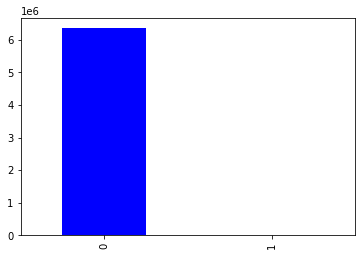

In [ ]:
#plotting bar graph for the isFraud class
data['isFraud'].value_counts().plot(kind="bar", color=["blue","red"])

In [ ]:
f_count = data[data["isFraud"] == 1]["isFraud"].count()
nf_count = data[data["isFraud"] == 0]["isFraud"].count()
print("Number of fraud transactions:", f_count)
print("Number of non-fraud transactions:", nf_count)
print("Fraud percent:", f_count / (f_count + nf_count) * 100)

Number of fraud transactions: 8213
Number of non-fraud transactions: 6354407
Fraud percent: 0.12908204481801522


In [ ]:
#visualizing the type of transactions
# Exploring transaction type
print(data.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
#now drawing the piechart
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type")
figure.show()

In [ ]:
#finding fraud percentage related every transaction type
fraud_df = data[data["isFraud"] == 1]

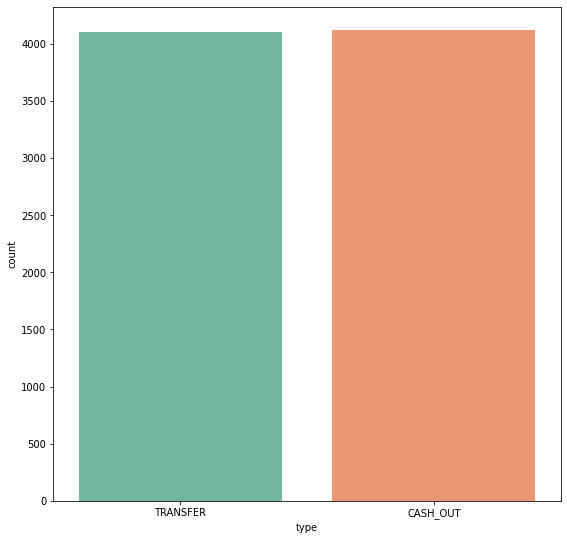

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = "type", palette = "Set2", data = fraud_df)



In [ ]:
#checking for Null Values
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
#attribute transformation for better traninng
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})

In [ ]:
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
#deciding the variables for prediction(Feature Selection)
# X  features called independent varibales 
# Y  features called dependent variable or 
x = data.drop(columns=['step','nameOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'],axis=1)
y = data['isFraud']

In [ ]:
#now datset Splitting
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
#now Trainig the model with Random Forest algorithms(classification)
model = RandomForestClassifier(n_estimators= 20, criterion="entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [ ]:
# MODEL EVALUATION
# confusion matrix and other metrics
y_pred = model.predict(x_test)
print("Precision score:",precision_score(y_test,y_pred))
print("Recall SCore:",recall_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("=========================")
print("confusion Matrix:",confusion_matrix(y_test,y_pred))

Precision score: 0.8993576017130621
Recall SCore: 0.8624229979466119
Accuracy: 0.9997013808776888
confusion Matrix: [[1906116     235]
 [    335    2100]]


In [ ]:
#now classification Report and f1 score
print(classification_report(y_test,y_pred))
print("F1 SCORE:",f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.90      0.86      0.88      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.93      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

F1 SCORE: 0.8805031446540881


In [ ]:
#NOW PREDICTING THE RESULT BY PASSING VALUES
features =[[2, 90000, 9000, 9000]]
print(model.predict(features))

[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



# Using The SMOTE Technique

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



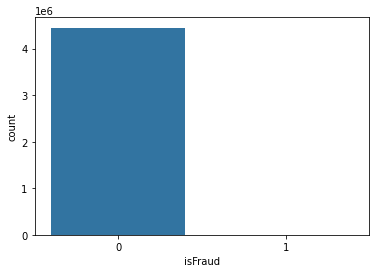

In [ ]:
# We use the SMOTE technique to solve the problem of Class Imbalance

#now visualizing the  training and testing sets
sns.countplot(y_train)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



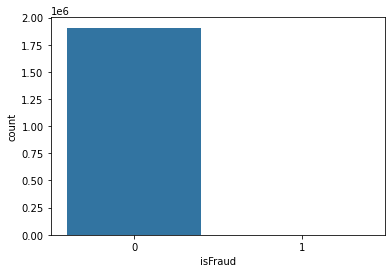

In [ ]:
#for testing set
sns.countplot(y_test)

In [ ]:
#so there is class imbalance ment in above both test and train sets
# so we will balance the class for TRAINIG SET and LOOK THE RESULTS
# balance the class with equal distribution
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train,y_train)

In [ ]:
y_smote.value_counts() #checking for fraud and Non Fraud Instances after resampling

0    4448056
1    4448056
Name: isFraud, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



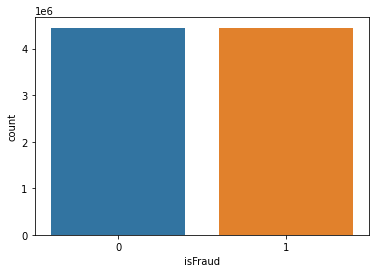

In [ ]:
#Now check the class balance after using smote
sns.countplot(y_smote)

In [ ]:
#Model Training usingS Random Forest CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators= 20, criterion="entropy")
model_rf.fit(x_smote,y_smote)  #training the model

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [ ]:
#Now saving the model for Prediction
pickle.dump(model_rf,open('smote_model.pkl','wb'))


In [ ]:
# MODEL EVALUATION
y1_pred = model_rf.predict(x_test)
print("Precision score:",precision_score(y_test,y1_pred))
print("Recall SCore:",recall_score(y_test,y1_pred))
print("Accuracy:",accuracy_score(y_test,y1_pred))
print("=========================")
print("confusion Matrix:",confusion_matrix(y_test,y1_pred))

Precision score: 0.3696380162653484
Recall SCore: 0.9519507186858316
Accuracy: 0.9978677546880583
confusion Matrix: [[1902398    3953]
 [    117    2318]]


In [ ]:
#now classification Report and f1 score
print(classification_report(y_test,y1_pred))
print("F1 SCORE:",f1_score(y_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.37      0.95      0.53      2435

    accuracy                           1.00   1908786
   macro avg       0.68      0.97      0.77   1908786
weighted avg       1.00      1.00      1.00   1908786

F1 SCORE: 0.5325063174821961
